In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# loading the data from csv file to a pandas Dataframe
raw_data = pd.read_csv('/content/mail_data.csv')

In [5]:
raw_data['Email_Type'] = raw_data['Email_Type'].replace({'ham': 'legitimate', 'spam': 'phishing'})

In [6]:
print(raw_data)

      Email_Type                                         Email_Text
0     legitimate  Go until jurong point, crazy.. Available only ...
1     legitimate                      Ok lar... Joking wif u oni...
2       phishing  Free entry in 2 a wkly comp to win FA Cup fina...
3     legitimate  U dun say so early hor... U c already then say...
4     legitimate  Nah I don't think he goes to usf, he lives aro...
...          ...                                                ...
5567    phishing  This is the 2nd time we have tried 2 contact u...
5568  legitimate               Will ü b going to esplanade fr home?
5569  legitimate  Pity, * was in mood for that. So...any other s...
5570  legitimate  The guy did some bitching but I acted like i'd...
5571  legitimate                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [7]:
# me chaning the column name for clarity
mail_data = raw_data.where((pd.notnull(raw_data)),'')

In [8]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

In [9]:
mail_data['Email_Type'].replace({'legitimate':0,'phishing':1},inplace=True)

<ipython-input-9-890c086643a8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mail_data['Email_Type'].replace({'legitimate':0,'phishing':1},inplace=True)
<ipython-input-9-890c086643a8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mail_data['Email_Type'].replace({'legitimate':0,'phishing':1},in

In [10]:
# separating the data as texts and type

X = mail_data['Email_Text']

Y = mail_data['Email_Type']

In [11]:
print(X,Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Email_Text, Length: 5572, dtype: object 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Email_Type, Length: 5572, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [13]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [14]:
#transforming the text data to feature vectors that can be used as input


feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [15]:
print(X_train_features)

  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.4131033779433779
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504036
  (1, 3046)	0.25037127926135183
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.32264078859437995
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877652
  (1, 2746)	0.33982970028640835
  (1, 2957)	0.33982970028640835
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.2969448295769459
  (1, 4080)	0.18880584110891166
  (2, 6601)	0.6056811524587516
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323754
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.472106650836418
  (4454, 2246)	0.472106650836418
  (4455, 4456)	0.24920025316220423
  (4455, 3922)	0.31287563163368587
  (4455, 6916)	0.19636985317119715
  (4455, 4715)	0.30714144758811196
  (

In [16]:
model = LogisticRegression()

In [17]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [18]:
# prediction on training data

ypred = model.predict(X_train_features)
accuracy= accuracy_score(Y_train, ypred)

In [19]:
print('Accuracy on training data : ', accuracy)

Accuracy on training data :  0.9676912721561588


In [20]:
# prediction on test data

y_pred= model.predict(X_test_features)
accuracy= accuracy_score(Y_test, y_pred)

In [21]:
print('Accuracy on test data : ', accuracy)

Accuracy on test data :  0.9668161434977578


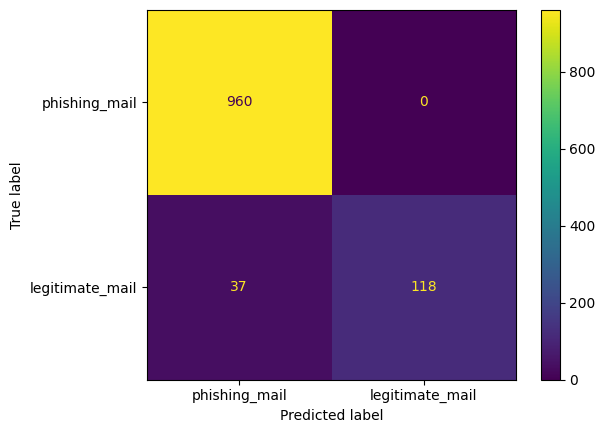

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
clf_L = confusion_matrix(Y_test,y_pred)
cx_ = ConfusionMatrixDisplay(clf_L,display_labels=['phishing_mail','legitimate_mail']).plot()
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

print("Logistic regression Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("\n Logistic Classification Report:")
print(classification_report(Y_test, y_pred))


Logistic regression Confusion Matrix:
[[960   0]
 [ 37 118]]

 Logistic Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       960
           1       1.00      0.76      0.86       155

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [38]:
from sklearn.svm import SVC

In [39]:
svm_mod=SVC()

In [40]:
svm_mod.fit(X_train_features, Y_train)

SVC()

In [41]:
# prediction on training data

ypred = svm_mod.predict(X_train_features)
accuracy= accuracy_score(Y_train, ypred)

In [42]:
print('Accuracy on training data : ', accuracy)

Accuracy on training data :  0.99798070450976


In [48]:
# prediction on test data

y_pred= svm_mod.predict(X_test_features)
accuracy= accuracy_score(Y_test, y_pred)

In [49]:
print('Accuracy on training data : ', accuracy)

Accuracy on training data :  0.979372197309417


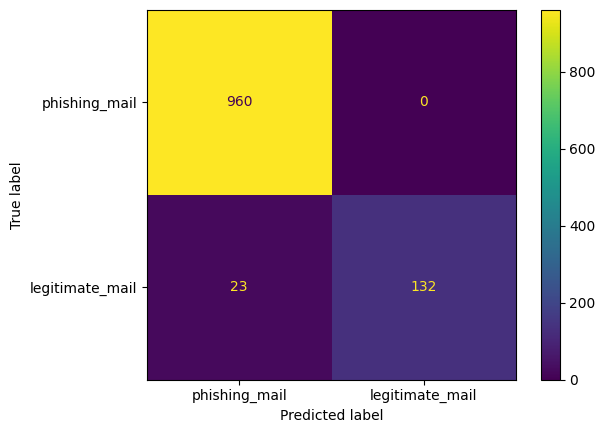

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
clf_L = confusion_matrix(Y_test,y_pred)
cx_ = ConfusionMatrixDisplay(clf_L,display_labels=['phishing_mail','legitimate_mail']).plot()
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

print("SVM regression Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("\n SVM Classification Report:")
print(classification_report(Y_test, y_pred))

SVM regression Confusion Matrix:
[[960   0]
 [ 23 132]]

 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       960
           1       1.00      0.85      0.92       155

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [52]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Legitimate mail')

else:
  print('Phishing mail')

[0]
Phishing mail


In [53]:
import pickle

In [55]:
filename='SVM_model.sav'
pickle.dump(svm_mod, open(filename, 'wb'))

In [56]:
filename='LOG_model.sav'
pickle.dump(model, open(filename, 'wb'))